## 코사인 유사도(Cosine Similarity)
코사인 유사도는 두 벡터 간의 코사인 각도를 이용하여 구할 수 있는 두 벡터의 유사도를 의미합니다. 두 벡터의 방향이 완전히 동일한 경우에는 1의 값을 가지며, 90°의 각을 이루면 0, 180°로 반대의 방향을 가지면 -1의 값을 갖게 됩니다. 즉, 결국 코사인 유사도는 -1 이상 1 이하의 값을 가지며 값이 1에 가까울수록 유사도가 높다고 판단할 수 있습니다. 이를 직관적으로 이해하면 두 벡터가 가리키는 방향이 얼마나 유사한가를 의미합니다.

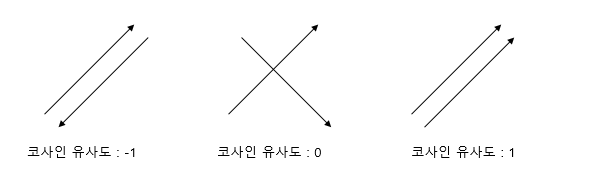

두 벡터 A, B에 대해서 코사인 유사도는 식으로 표현하면 다음과 같습니다.

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>s</mi>
  <mi>i</mi>
  <mi>m</mi>
  <mi>i</mi>
  <mi>l</mi>
  <mi>a</mi>
  <mi>r</mi>
  <mi>i</mi>
  <mi>t</mi>
  <mi>y</mi>
  <mo>=</mo>
  <mi>c</mi>
  <mi>o</mi>
  <mi>s</mi>
  <mo stretchy="false">(</mo>
  <mi>&#x398;</mi>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mfrac>
    <mrow>
      <mi>A</mi>
      <mo>&#x22C5;</mo>
      <mi>B</mi>
    </mrow>
    <mrow>
      <mo data-mjx-texclass="ORD" stretchy="false">|</mo>
      <mo data-mjx-texclass="ORD" stretchy="false">|</mo>
      <mi>A</mi>
      <mo data-mjx-texclass="ORD" stretchy="false">|</mo>
      <mo data-mjx-texclass="ORD" stretchy="false">|</mo>
      <mtext>&#xA0;</mtext>
      <mo data-mjx-texclass="ORD" stretchy="false">|</mo>
      <mo data-mjx-texclass="ORD" stretchy="false">|</mo>
      <mi>B</mi>
      <mo data-mjx-texclass="ORD" stretchy="false">|</mo>
      <mo data-mjx-texclass="ORD" stretchy="false">|</mo>
    </mrow>
  </mfrac>
  <mo>=</mo>
  <mfrac>
    <mrow>
      <munderover>
        <mo data-mjx-texclass="OP">&#x2211;</mo>
        <mrow data-mjx-texclass="ORD">
          <mi>i</mi>
          <mo>=</mo>
          <mn>1</mn>
        </mrow>
        <mrow data-mjx-texclass="ORD">
          <mi>n</mi>
        </mrow>
      </munderover>
      <mrow data-mjx-texclass="ORD">
        <msub>
          <mi>A</mi>
          <mrow data-mjx-texclass="ORD">
            <mi>i</mi>
          </mrow>
        </msub>
        <mi>&#xD7;</mi>
        <msub>
          <mi>B</mi>
          <mrow data-mjx-texclass="ORD">
            <mi>i</mi>
          </mrow>
        </msub>
      </mrow>
    </mrow>
    <mrow>
      <msqrt>
        <munderover>
          <mo data-mjx-texclass="OP">&#x2211;</mo>
          <mrow data-mjx-texclass="ORD">
            <mi>i</mi>
            <mo>=</mo>
            <mn>1</mn>
          </mrow>
          <mrow data-mjx-texclass="ORD">
            <mi>n</mi>
          </mrow>
        </munderover>
        <mo stretchy="false">(</mo>
        <msub>
          <mi>A</mi>
          <mrow data-mjx-texclass="ORD">
            <mi>i</mi>
          </mrow>
        </msub>
        <msup>
          <mo stretchy="false">)</mo>
          <mn>2</mn>
        </msup>
      </msqrt>
      <mi>&#xD7;</mi>
      <msqrt>
        <munderover>
          <mo data-mjx-texclass="OP">&#x2211;</mo>
          <mrow data-mjx-texclass="ORD">
            <mi>i</mi>
            <mo>=</mo>
            <mn>1</mn>
          </mrow>
          <mrow data-mjx-texclass="ORD">
            <mi>n</mi>
          </mrow>
        </munderover>
        <mo stretchy="false">(</mo>
        <msub>
          <mi>B</mi>
          <mrow data-mjx-texclass="ORD">
            <mi>i</mi>
          </mrow>
        </msub>
        <msup>
          <mo stretchy="false">)</mo>
          <mn>2</mn>
        </msup>
      </msqrt>
    </mrow>
  </mfrac>
</math>

In [1]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

def cos_sim(A, B):
  return dot(A, B)/(norm(A)*norm(B))

doc1 = np.array([0,1,1,1])
doc2 = np.array([1,0,1,1])
doc3 = np.array([2,0,2,2])

print('문서 1과 문서2의 유사도 :',cos_sim(doc1, doc2))
print('문서 1과 문서3의 유사도 :',cos_sim(doc1, doc3))
print('문서 2와 문서3의 유사도 :',cos_sim(doc2, doc3))

문서 1과 문서2의 유사도 : 0.6666666666666667
문서 1과 문서3의 유사도 : 0.6666666666666667
문서 2와 문서3의 유사도 : 1.0000000000000002


### 유사도 이용한 추천 시스템 구현

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

data = pd.read_csv('../archive/movies_metadata.csv', low_memory=False)
data.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


좋아하는 영화를 입력하면, 해당 영화의 줄거리와 유사한 줄거리의 영화를 찾아서 추천하는 시스템을 만들 것입니다.

In [3]:
# 상위 2만개의 샘플을 data에 저장
data = data.head(20000)

In [4]:
# TF-IDF를 연산할 때 데이터에 Null 값이 들어있으면 에러가 발생합니다.
# TF-IDF의 대상이 되는 data의 overview 열에 결측값에 해당하는 Null 값이 있는지 확인합니다.
print('overview 열의 결측값의 수:',data['overview'].isnull().sum())

overview 열의 결측값의 수: 135


In [5]:
# 결측값을 빈 값으로 대체
data['overview'] = data['overview'].fillna('')

In [6]:
#  overview열에 대해서 TF-IDF 행렬을 구한 후 행렬의 크기를 출력.
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['overview'])
print('TF-IDF 행렬의 크기(shape) :',tfidf_matrix.shape)

TF-IDF 행렬의 크기(shape) : (20000, 47487)


TF-IDF 행렬의 크기는 20,000의 행을 가지고 47,847의 열을 가지는 행렬입니다. 다시 말해 20,000개의 영화를 표현하기 위해서 총 47,487개의 단어가 사용되었음을 의미합니다. 또는 47,847차원의 문서 벡터가 20,000개가 존재한다고도 표현할 수 있을 겁니다. 

In [7]:
# 20,000개의 문서 벡터에 대해서 상호 간의 코사인 유사도를 구합니다.
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print('코사인 유사도 연산 결과 :',cosine_sim.shape)

코사인 유사도 연산 결과 : (20000, 20000)


코사인 유사도 연산 결과로는 20,000행 20,000열의 행렬을 얻습니다. 이는 20,000개의 각 문서 벡터(영화 줄거리 벡터)와 자기 자신을 포함한 20,000개의 문서 벡터 간의 유사도가 기록된 행렬입니다. 모든 20,000개 영화의 상호 유사도가 기록되어져 있습니다. 이제 기존 데이터프레임으로부터 영화의 타이틀을 key, 영화의 인덱스를 value로 하는 딕셔너리 title_to_index를 만들어둡니다.



In [8]:
title_to_index = dict(zip(data['title'], data.index))

# 영화 제목 Father of the Bride Part II의 인덱스를 리턴
idx = title_to_index['Father of the Bride Part II']
print(idx)

4


선택한 영화의 제목을 입력하면 코사인 유사도를 통해 가장 overview가 유사한 10개의 영화를 찾아내는 함수를 만듭니다.

In [9]:
def get_recommendations(title, cosine_sim=cosine_sim):
    # 선택한 영화의 타이틀로부터 해당 영화의 인덱스를 받아온다.
    idx = title_to_index[title]

    # 해당 영화와 모든 영화와의 유사도를 가져온다.
    sim_scores = list(enumerate(cosine_sim[idx]))

    # 유사도에 따라 영화들을 정렬한다.
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # 가장 유사한 10개의 영화를 받아온다.
    sim_scores = sim_scores[1:11]

    # 가장 유사한 10개의 영화의 인덱스를 얻는다.
    movie_indices = [idx[0] for idx in sim_scores]

    # 가장 유사한 10개의 영화의 제목을 리턴한다.
    return data['title'].iloc[movie_indices]

In [10]:
get_recommendations('The Dark Knight Rises')

12481                            The Dark Knight
150                               Batman Forever
1328                              Batman Returns
15511                 Batman: Under the Red Hood
585                                       Batman
9230          Batman Beyond: Return of the Joker
18035                           Batman: Year One
19792    Batman: The Dark Knight Returns, Part 1
3095                Batman: Mask of the Phantasm
10122                              Batman Begins
Name: title, dtype: object